In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel(r'C:\Users\Lenovo\Downloads\internships\spark\d.xlsx')

In [24]:
data

,Scores,Hours
0,21,2.5
1,47,5.1
2,27,3.2
3,75,8.5
4,30,3.5
5,20,1.5
6,88,9.2
7,60,5.5
8,81,8.3
9,25,2.7


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Scores  25 non-null     int64  
 1   Hours   25 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [14]:
data.shape

(25, 3)

In [23]:
data.isnull().sum()

Scores    0
Hours     0
dtype: int64

In [3]:
data['Hours']=data['Hours       ,Scores']

In [4]:
data.drop(['Hours       ,Scores'],axis=1,inplace=True)

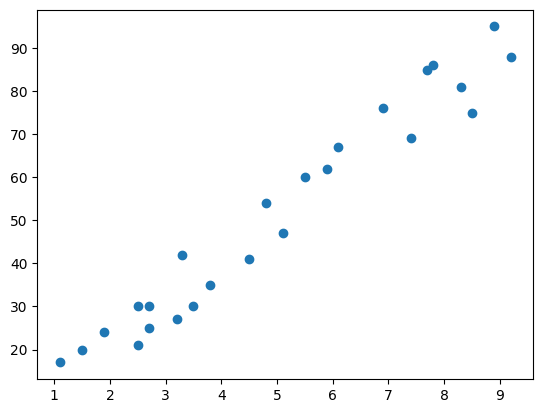

In [5]:
plt.scatter(x='Hours',y='Scores',data=data)

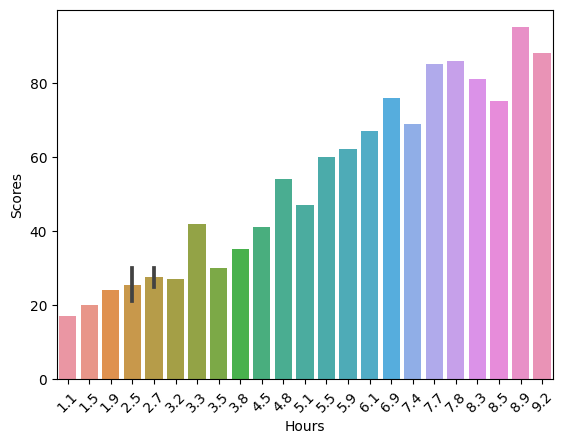

In [6]:
sns.barplot(x='Hours',y='Scores',data=data)
plt.xticks(rotation=45);

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [8]:
X=data['Hours']
y=data['Scores']

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=43)

In [12]:
X_train_reshaped = X_train.values.reshape(-1, 1)
y_train_reshaped = y_train.values.reshape(-1, 1)

linear_model = LinearRegression().fit(X_train_reshaped, y_train_reshaped)

X_test_reshaped = X_test.values.reshape(-1, 1)

# Make predictions
y_predict = linear_model.predict(X_test_reshaped)

# Calculate mean absolute error
mae = mean_absolute_error(y_predict, y_test)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 6.392983364991657


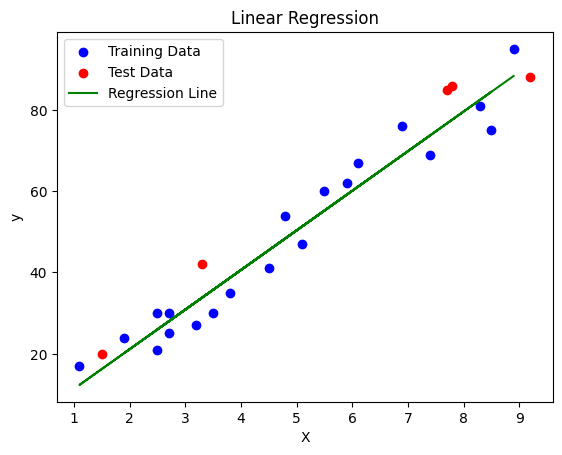

In [17]:
line = linear_model.coef_ * X_train_reshaped + linear_model.intercept_

# Plot the original data points
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')

# Plot the regression line
plt.plot(X_train, line, color='green', label='Regression Line')

# Labeling the plot
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()

# Show the plot
plt.show()

In [20]:
MSE = mean_squared_error(y_test,y_predict)

# calculate ROOT Mean square error
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))

# calculate  Mean absolute error
MAE=mean_absolute_error(y_test, y_predict)

# Calculate R square vale
rsq = r2_score(y_test,y_predict)

print('mean squared error :',MSE)
print('Root mean squared error :',RMSE)
print('mean absolute error :',MAE)
print('r square :',rsq)

mean squared error : 46.411366115182375
Root mean squared error : 6.812588796865871
mean absolute error : 6.392983364991657
r square : 0.9408139077290574


In [21]:
print('Intercept of the model:',linear_model.intercept_)

print('Coefficient of the line:',linear_model.coef_)

y_hat = linear_model.coef_ * 3 +  linear_model.intercept_ 
print(y_hat)

Intercept of the model: [1.62325639]
Coefficient of the line: [[9.74462288]]
[[30.85712504]]


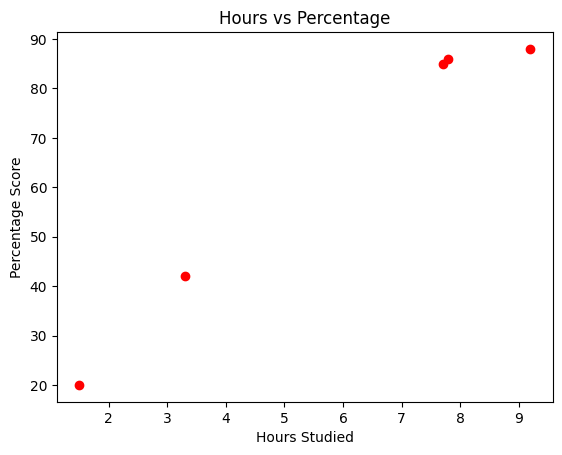

In [22]:
plt.scatter(X_test, y_test, color = 'red')

plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

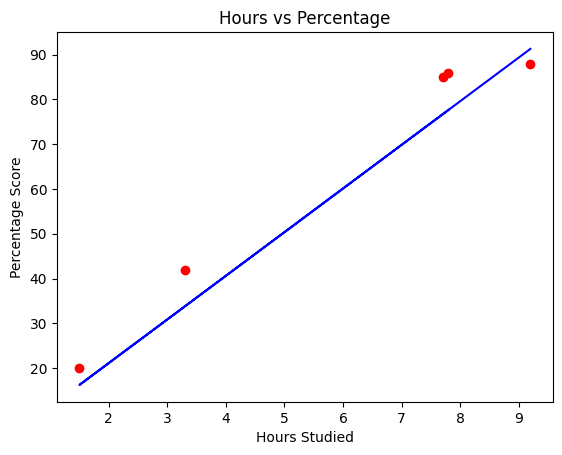

In [23]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_predict, color = 'blue')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()